## Business Understanding

**Title**

**Overview**
 - Clear statement of scope of work(analysis):
    - "This project analyzes ... which includes [data]"
    - "Descriptive analysis of [primary data fields used] which shows...
    - "The [business looking to buy aircraft] can use this analysis to...

This project analyzes flight risk for professionally built aircrafts under inclement weather conditions within the past 30 years. Descriptive analysis of aviation accident and incident data shows...

**Business Problem**
- Clear statement of business problem:
    - [business] may be able to...at a low risk of...to help diversify their business portfolio

Our ficticious business may be able to confidentally purchase the safest commercial and private aircrafts with the fewest incident/accident rates in inclement weather to ensure a lower risk aviation business in an area with a rapidly changing climate and higher severity of inclement weather.



**Data Understanding**
- Clear explanation of data file, fields used, and why

## Data Preparation

**Read data**
- Review/show field characteristics
- Determine focus of business problem
- Determine most relevant fields to solve business problem

**Clean data**
- Replace column names
- Drop unneccessary columns
- Filter out relevant info
- Add filtered columns
- Replace dataframe

**Feature Engineering**
- Create a feature to analyze risk among relevant aircraft
- Lamda functions?
    - Maybe use time-series data if relevant
- Basic measure of central tendancy calcs for reference

## Data Analysis

**Visualizations**
- Import matplotlib / seaborn
- Analysis Q1 w/ associated plot
- Analysis Q2 w/ associated plot
- Analysis Q3 w/ associated plot

## Conclusions

**Recommendations**
- Include at least 3 recommendations that relate to visualizations

**Data Limitations**

## Next Steps

**Futher Analysis**
- Expand data used in analysis?
- Suggest a model to accomplish something important?
- Suggest risk analysis predictions?

In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [449]:

#dtypes = {'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'}
aviation_df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'})
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

/Users/kariprimiano/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [450]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Aviation Data

The aviation dataset includes aircraft accident and incident records from October 1948 to December 2022, and includes location, accident severity, weather conditions, and aircraft specifications.

Filter data:
- Last 20 years
- United States
- Professionally built
- Inclement weather

Drop irrelevant columns:
- Columns with over 50% missing values


Create new dataframe with relevant columns


In [451]:
#Formatting data

# Potentially format column headers

aviation_df["Incident.Date"] = pd.to_datetime(aviation_df["Event.Date"])
aviation_df["Incident.Date"].describe()

<ipython-input-451-bf06c9160983>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aviation_df["Incident.Date"].describe()


count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Incident.Date, dtype: object

In [452]:
aviation_df["Make"] = aviation_df["Make"].str.lower()

In [453]:
aviation_df.columns = aviation_df.columns.str.lower().str.replace('.', '_')

In [454]:
# Drop unnecessary columns
aviation_df.drop(columns = ["location", "registration_number", "accident_number", "latitude", "longitude", "airport_code", "airport_name", "far_description", "schedule", "air_carrier", "report_status", "publication_date"], inplace=True)


In [455]:
#create column with the year of each event
aviation_df['event_year'] = [int(year[:4]) for year in aviation_df['event_date']]
aviation_df.head()

,event_id,investigation_type,event_date,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,...,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,incident_date,event_year
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,stinson,108-3,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948-10-24,1948
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,piper,PA24-180,No,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962-07-19,1962
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,cessna,172M,No,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974-08-30,1974
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,rockwell,112,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977-06-19,1977
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,cessna,501,No,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979-08-02,1979


In [456]:
aviation_df["purpose_of_flight"].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: purpose_of_flight, dtype: int64

In [457]:

# purpose_of_flight_filtered = ["Personal", "Business", "Executive/corporate", "Public Aircraft", "Other Work Use", "Unknown", ]
# df['Relevant.Year'] = np.where(df['Event.Year'] >= y, True, False)

In [458]:
# Filter dates, weather conditions, and amateur built

# Create new df of filtered data

filtered_df = aviation_df[(aviation_df["event_year"] >= 1992) & (aviation_df["weather_condition"] == "IMC") & (aviation_df["amateur_built"] == "No")]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3446 entries, 29675 to 88843
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                3446 non-null   object        
 1   investigation_type      3446 non-null   object        
 2   event_date              3446 non-null   object        
 3   country                 3439 non-null   object        
 4   injury_severity         3438 non-null   object        
 5   aircraft_damage         3301 non-null   object        
 6   aircraft_category       1161 non-null   object        
 7   make                    3445 non-null   object        
 8   model                   3445 non-null   object        
 9   amateur_built           3446 non-null   object        
 10  number_of_engines       3194 non-null   float64       
 11  engine_type             3192 non-null   object        
 12  purpose_of_flight       3016 non-null   obj

company_list = []
for company in aviation['make']:
    company_list.append(company)
company_list_strings = [str(x) for x in company_list]
company_list_strings.sort()
company_list_strings

In [459]:
# Using the new filtered df, take a value counts measure of the relevant fields

#aviation_df = aviation_df.applymap(str)
#value_counts = aviation_df.apply(lambda x: x.value_counts().astype(str))
#value_counts

In [460]:
cleaned_top_companies = []

for company in filtered_df["make"]:
    if "airbus" in str(company):
        cleaned_company = "airbus"
        cleaned_top_companies.append(cleaned_company)
    elif "beech" in str(company):
        cleaned_company = "beechcraft"
        cleaned_top_companies.append(cleaned_company)
    elif "boeing" in str(company):
        cleaned_company = "boeing"
        cleaned_top_companies.append(cleaned_company)
    elif "bombardier" in str(company):
        cleaned_company = "bombardier"
        cleaned_top_companies.append(cleaned_company)
    elif "embraer" in str(company):
        cleaned_company = "embraer"
        cleaned_top_companies.append(cleaned_company)
    elif "piper" in str(company):
        cleaned_company = "piper"
        cleaned_top_companies.append(cleaned_company)
    elif "diamond" in str(company):
        cleaned_company = "diamond"
        cleaned_top_companies.append(cleaned_company)
    elif "mitsubishi" in str(company):
        cleaned_company = "mitsubishi"
        cleaned_top_companies.append(cleaned_company)
    elif "gulfstream" in str(company):
        cleaned_company = "gulfstream"
        cleaned_top_companies.append(cleaned_company)
    elif "cessna" in str(company):
        cleaned_company = "cessna"
        cleaned_top_companies.append(cleaned_company)
    else:
        cleaned_top_companies.append(company)
        
company_list_strings = [str(x) for x in cleaned_top_companies]
company_list_strings.sort()


In [461]:
top_companies = ["boeing", "airbus", "bombardier", "embraer", "cessna", "piper", 
             "diamond", "mitsubishi", "beechcraft", "gulfstream"]

counts = {}
for company in company_list_strings:
    if company in top_companies:
        if company in counts:
            counts[company] +=1
        else:
            counts[company] = 1
            
            
counts

{'airbus': 34,
 'beechcraft': 470,
 'boeing': 143,
 'bombardier': 15,
 'cessna': 1036,
 'diamond': 5,
 'embraer': 33,
 'gulfstream': 11,
 'mitsubishi': 23,
 'piper': 748}

In [462]:

for company in filtered_df["make"]:
    if "airbus" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'airbus')
    elif "beech" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'beechcraft')
    elif "boeing" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'boeing')
    elif "bombardier" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'bombardier')
    elif "embraer" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'embraer')
    elif "piper" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'piper')
    elif "diamond" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'diamond')
    elif "mitsubishi" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'mitsubishi')
    elif "gulfstream" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'gulfstream')
    elif "cessna" in str(company):
        filtered_df['make'] = filtered_df['make'].str.replace(company, 'cessna')
            
filtered_df["make"].value_counts().sort_index()[:50]


<ipython-input-462-cc2a7b600e6a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['make'] = filtered_df['make'].str.replace(company, 'piper')
<ipython-input-462-cc2a7b600e6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['make'] = filtered_df['make'].str.replace(company, 'beechcraft')
<ipython-input-462-cc2a7b600e6a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

aero commander                      28
aero vodochody                       2
aero vodochody aero works            1
aero vodochody aero. works           2
aeronca                              4
aeropro cz                           2
aeropro cz s r o                     1
aerospatiale                        21
aerospatiale alenia                  1
aerostar                             4
aerostar aircraft corporation        1
aerotek                              1
agusta                               9
agusta spa                           2
air tractor                         11
air tractor inc                      5
airborne                             1
airbus                              34
aircraft mfg & development co.       1
american                             1
american aviation                    1
american champion aircraft           1
american general aircraft            2
arrow aircraft co.                   1
atr                                  3
augusta                  

In [463]:

filtered_makes = filtered_df.loc[filtered_df["make"].isin(top_companies)]

filtered_makes["make"].value_counts()

cessna        1036
piper          748
beechcraft     470
boeing         143
airbus          34
embraer         33
mitsubishi      23
bombardier      15
gulfstream      11
diamond          5
Name: make, dtype: int64

In [464]:
#create a dictionary for make and counts
make = list(filtered_df['make'].value_counts().sort_index().index)
count = list(filtered_df['make'].value_counts().sort_index().values)
make_dict = {make[i]: count[i] for i in range(len(make))}
make_dict

{'aero commander': 28,
 'aero vodochody': 2,
 'aero vodochody aero works': 1,
 'aero vodochody aero. works': 2,
 'aeronca': 4,
 'aeropro cz': 2,
 'aeropro cz s r o': 1,
 'aerospatiale': 21,
 'aerospatiale alenia': 1,
 'aerostar': 4,
 'aerostar aircraft corporation': 1,
 'aerotek': 1,
 'agusta': 9,
 'agusta spa': 2,
 'air tractor': 11,
 'air tractor inc': 5,
 'airborne': 1,
 'airbus': 34,
 'aircraft mfg & development co.': 1,
 'american': 1,
 'american aviation': 1,
 'american champion aircraft': 1,
 'american general aircraft': 2,
 'arrow aircraft co.': 1,
 'atr': 3,
 'augusta': 1,
 'ayres': 1,
 'ballonbau worner gmbh': 1,
 'balloon works': 1,
 'beechcraft': 470,
 'bell': 89,
 'bell helicopter textron': 3,
 'bell helicopter textron canada': 1,
 'bellanca': 24,
 'boeing': 143,
 'bombardier': 15,
 'british aerospace': 13,
 'britten-norman': 3,
 'canadair': 6,
 'casa': 2,
 'cesna': 1,
 'cessna': 1036,
 'chamberlain gerald': 1,
 'champion': 3,
 'christen industries': 1,
 'cirrus': 21,
 'ci

In [465]:
filtered_df["top_makes"] = filtered_df["make"].map(make_dict)

<ipython-input-465-bae655161b40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["top_makes"] = filtered_df["make"].map(make_dict)


TypeError: 'value' must be an instance of str or bytes, not a float

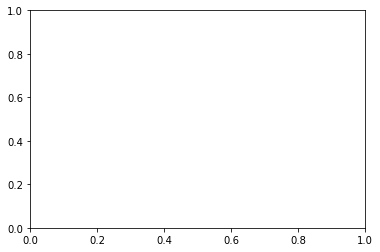

In [466]:
y1 = aviation_df["weather_condition"] == "IMC"
y2 = aviation_df["weather_condition"] == "VMC"

plt.bar(aviation_df["injury_severity"], y1, color="r")
plt.bar(aviation_df["injury_severity"], y2, bottom=y1, color="b")
plt.show()

KeyError: 'weather'

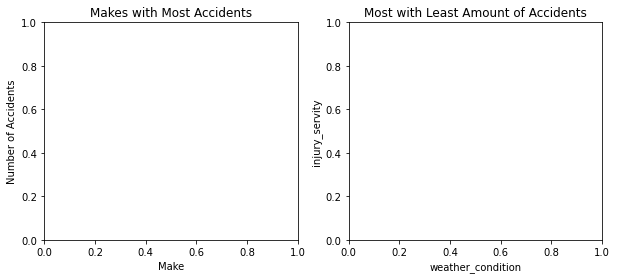

In [ ]:
accidents_by_make_fig, accidents_by_make_axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

accidents_by_make_axes[0].set_title('Makes with Most Accidents')
accidents_by_make_axes[0].set_ylabel('Number of Accidents')
accidents_by_make_axes[0].set_xlabel('Make')

accidents_by_make_axes[1].set_title('Most with Least Amount of Accidents')
accidents_by_make_axes[1].set_ylabel('injury_servity')
accidents_by_make_axes[1].set_xlabel('weather_condition')

accidents_by_make_low = filtered_df['weather'][filtered_df['investigation_type'].value_counts().tail()]
accidents_by_make_high = filtered_df['make'][filtered_df['investigation_type'].value_counts().head()]

accidents_by_make_axes[0].hist(accidents_by_make_low, bins=15)
accidents_by_make_axes[1].hist(accidents_by_make_high, bins=30)

plt.savefig(dpi=150)
plt.show()

In [ ]:
# Add another layer of filtering for our relevant columns

# Figure out what to do with null values

# Change unknown and null values to the same

In [ ]:
# Start plotting stuff

In [ ]:
aviation_df['event_date'].sort_values()

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88886    2022-12-26
88887    2022-12-26
88884    2022-12-26
88885    2022-12-26
88888    2022-12-29
Name: event_date, Length: 88889, dtype: object

In [ ]:
# find number of entries for each year
aviation_df['Event.Year'].value_counts().sort_index()

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Event.Year, dtype: int64

In [ ]:
#create a dictionary for years and counts
year = list(df['Event.Year'].value_counts().sort_index().index)
count = list(df['Event.Year'].value_counts().sort_index().values)
year_dict = {year[i]: count[i] for i in range(len(year))}
year_dict

NameError: name 'df' is not defined

In [ ]:
#show which Event.Years are relevant years
y = 2013
df['Relevant.Year'] = np.where(df['Event.Year'] >= y, True, False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Event.Year,Relevant.Year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,...,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,False
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,False
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,False
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982,False
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Airplane,Cessna,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982,False


In [ ]:
list(df['Amateur.Built'].value_counts().sort_index())

[24417, 3183]

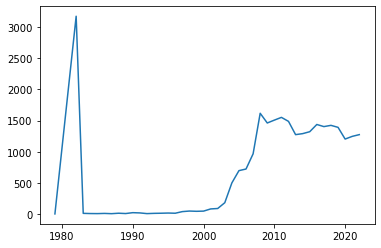

In [ ]:
x1 = df['Event.Year'].value_counts().sort_index().index
y1 = df['Event.Year'].value_counts().sort_index().values

plt.plot(x1, y1)
plt.show()

In [ ]:
df['Number.of.Engines'].value_counts().sort_index()

0.0        9
1.0    21176
2.0     3515
3.0       58
4.0      103
6.0        1
8.0        1
Name: Number.of.Engines, dtype: int64

In [ ]:
df['Engine.Type'].value_counts().sort_index()

Electric               5
Geared Turbofan       12
Reciprocating      20715
Turbo Fan            970
Turbo Jet            158
Turbo Prop          1366
Turbo Shaft           11
UNK                    1
Unknown              153
Name: Engine.Type, dtype: int64

In [ ]:
country = list(df['Country'].value_counts().sort_index().index)
count2 = list(df['Country'].value_counts().sort_index().values)
country_dict = {country[i]: count2[i] for i in range(len(country))}
country_dict

{'ATLANTIC OCEAN': 2,
 'AY': 1,
 'Afghanistan': 10,
 'Albania': 1,
 'American Samoa': 15,
 'Angola': 4,
 'Antarctica': 5,
 'Antigua and Barbuda': 1,
 'Argentina': 60,
 'Australia': 162,
 'Austria': 25,
 'Bahamas': 53,
 'Bahrain': 6,
 'Bangladesh': 7,
 'Barbados': 2,
 'Belgium': 26,
 'Bolivia': 14,
 'Bosnia and Herzegovina': 2,
 'Brazil': 244,
 'Bulgaria': 5,
 'Cambodia': 1,
 'Cameroon': 2,
 'Canada': 176,
 'Cayenne': 1,
 'Cayman Islands': 3,
 'Central Africa': 12,
 'Central African Republic': 1,
 'Chile': 29,
 'China': 45,
 'Colombia': 115,
 'Costa Rica': 6,
 "Cote D'ivoire": 1,
 'Croatia': 11,
 'Cuba': 6,
 'Cyprus': 1,
 'Czech Republic': 7,
 "Côte d'Ivoire": 1,
 'Denmark': 24,
 'Dominican Republic': 29,
 'Ecuador': 6,
 'Egypt': 6,
 'El Salvador': 2,
 'Estonia': 2,
 'Eswatini': 48,
 'Ethiopia': 5,
 'Federated States Of Micronesia': 1,
 'Fiji': 2,
 'Finland': 14,
 'France': 138,
 'French Polynesia': 1,
 'Gabon': 1,
 'Gambia': 1,
 'Georgia': 11,
 'Germany': 121,
 'Ghana': 2,
 'Great Brit